In [1]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sn
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [2]:
data = arff.loadarff('../dataSet/AEEEM/EQ.arff')

In [3]:
df = pd.DataFrame(data[0])
df.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,3.0,0.002547,0.002555,4.0,0.00,3.04,0.393707,0.003049,1.01,0.004091,...,0.005627,0.000000,0.004406,8.0,8.0,0.008431,3.50,0.103594,0.003611,b'buggy'
1,37.0,0.008643,0.004756,71.0,0.00,14.37,2.093750,0.001481,2.02,0.015332,...,0.018761,0.001486,0.060301,7.0,7.0,0.021602,43.12,0.328692,0.009906,b'buggy'
2,3.0,0.001479,0.009143,5.0,1.01,3.08,0.484675,0.000000,6.17,0.001953,...,0.003117,0.001486,0.002325,7.0,2.0,0.011859,4.68,0.125841,0.001655,b'clean'
3,10.0,0.005642,0.005395,38.0,0.00,1.06,0.811584,0.000876,6.07,0.000739,...,0.020376,0.002338,0.030608,17.0,10.0,0.020478,24.06,0.170416,0.007000,b'buggy'
4,1.0,0.001350,0.000000,1.0,1.01,1.01,0.031940,0.000876,0.00,0.000000,...,0.000566,0.003017,0.001492,22.0,7.0,0.000652,2.13,0.055912,0.001572,b'buggy'


In [4]:
df.describe()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,numberOfBugsFoundUntil:,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,2.083333,0.001212,0.001558,4.299383,0.261574,0.900432,0.154263,0.000553,0.887840,0.000856,...,4.586420,0.002645,0.001492,0.003581,14.722222,5.743827,0.003652,2.929660,0.034247,0.001365
std,5.848646,0.003069,0.003452,7.906567,0.949242,2.017897,0.310351,0.001573,1.812751,0.002409,...,8.452852,0.005133,0.002422,0.007835,14.142902,7.186963,0.006038,6.268788,0.053297,0.003409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.034743,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.001486,0.000000,9.000000,4.000000,0.000571,0.000000,0.002459,0.000000
75%,1.000000,0.000851,0.001306,4.000000,0.000000,1.010000,0.141907,0.000389,1.010000,0.000540,...,4.000000,0.003065,0.001829,0.003101,17.000000,7.000000,0.004918,3.227500,0.057904,0.000863
max,49.000000,0.024636,0.023417,71.000000,7.740000,16.250000,2.670750,0.015215,11.140000,0.019631,...,78.000000,0.037312,0.019677,0.060301,111.000000,54.000000,0.039637,48.680000,0.328692,0.027806


In [5]:
defect_true_false = df.groupby('class')['class'].apply(lambda x: x.count())
print(defect_true_false)

class
b'buggy'    129
b'clean'    195
Name: class, dtype: int64


In [6]:
df['class'].str.decode("utf-8")

0      buggy
1      buggy
2      clean
3      buggy
4      buggy
       ...  
319    clean
320    clean
321    buggy
322    clean
323    clean
Name: class, Length: 324, dtype: object

In [7]:
X= df.iloc[ : , :-1].values
y= df['class'].str.decode("utf-8").map({'buggy': 1, 'clean': 0})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# transform the dataset
oversample = SMOTE()
X_train_balance, y_train_balance = oversample.fit_resample(X_train, y_train)

In [10]:
counterBefore = Counter(y_train)

In [11]:
print(counterBefore)

Counter({0: 160, 1: 99})


In [12]:
counterAfter= Counter(y_train_balance)

In [13]:
print(counterAfter)

Counter({1: 160, 0: 160})


In [14]:
arr_X_train = np.array_split(X_train, 3)
arr_y_train = np.array_split(y_train, 3)

In [15]:
clust1_X_train, clust1_X_test, clust1_y_train, clust1_y_test = train_test_split(arr_X_train[0],arr_y_train[0], test_size=0.2,random_state=1)

dt1 = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(clust1_X_train,clust1_y_train)
pred1 = dt1.predict(clust1_X_test)
print("Accuracy of DT",metrics.accuracy_score(clust1_y_test, pred1))

svm1 = svm.SVC().fit(clust1_X_train,clust1_y_train)
pred1 = svm1.predict(clust1_X_test)
print("Accuracy of svm",metrics.accuracy_score(clust1_y_test, pred1))

log1 = LogisticRegression(max_iter=1000).fit(clust1_X_train,clust1_y_train)
pred1 = log1.predict(clust1_X_test)
print("Accuracy of logistic",metrics.accuracy_score(clust1_y_test, pred1))

Accuracy of DT 0.7222222222222222
Accuracy of svm 0.7777777777777778
Accuracy of logistic 0.7222222222222222


C:\Users\AdityaShankar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
clust2_X_train, clust2_X_test, clust2_y_train, clust2_y_test = train_test_split(arr_X_train[1],arr_y_train[1], test_size=0.2,random_state=1)

dt2 = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(clust2_X_train,clust2_y_train)
pred2 = dt2.predict(clust2_X_test)
print("Accuracy of DT",metrics.accuracy_score(clust2_y_test, pred2))

svm2 = svm.SVC().fit(clust2_X_train,clust2_y_train)
pred2 = svm2.predict(clust2_X_test)
print("Accuracy of svm",metrics.accuracy_score(clust2_y_test, pred2))

log2 = LogisticRegression(max_iter=1000).fit(clust2_X_train,clust2_y_train)
pred2 = log2.predict(clust2_X_test)
print("Accuracy of logistic",metrics.accuracy_score(clust2_y_test, pred2))

Accuracy of DT 0.7222222222222222
Accuracy of svm 0.7222222222222222
Accuracy of logistic 0.8333333333333334


In [17]:
clust3_X_train, clust3_X_test, clust3_y_train, clust3_y_test = train_test_split(arr_X_train[2],arr_y_train[2], test_size=0.2,random_state=1)

dt3 = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(clust3_X_train,clust3_y_train)
pred3 = dt3.predict(clust3_X_test)
print("Accuracy of DT",metrics.accuracy_score(clust3_y_test, pred3))

svm3 = svm.SVC().fit(clust3_X_train,clust3_y_train)
pred3 = svm3.predict(clust3_X_test)
print("Accuracy of svm",metrics.accuracy_score(clust3_y_test, pred3))

log3 = LogisticRegression(max_iter=1000).fit(clust3_X_train,clust3_y_train)
pred3 = log3.predict(clust3_X_test)
print("Accuracy of logistic",metrics.accuracy_score(clust3_y_test, pred3))

Accuracy of DT 0.6111111111111112
Accuracy of svm 0.6666666666666666
Accuracy of logistic 0.4444444444444444


In [18]:
#train
pred_y_clust1 = svm1.predict(X_train)
pred_y_clust2 = log2.predict(X_train)
pred_y_clust3 = svm3.predict(X_train)
#test
pred_y_test_clust1 = svm1.predict(X_test)
pred_y_test_clust2 = log2.predict(X_test)
pred_y_test_clust3 = svm3.predict(X_test)


In [19]:
X_train_new = X_train
i = 0
for data in X_train_new:
    np.append(data,pred_y_clust1[i])
    np.append(data,pred_y_clust2[i])
    np.append(data,pred_y_clust3[i])
    i = i + 1

In [20]:
X_test_new = X_test
i = 0
for data in X_test_new:
    np.append(data,pred_y_test_clust1[i])
    np.append(data,pred_y_test_clust2[i])
    np.append(data,pred_y_test_clust3[i])
    i = i + 1

In [21]:
gateDT = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(X_train_new,y_train)
#Predict the response for test dataset
gateDT_pred = gateDT.predict(X_test_new)
print("Accuracy of Entropy based Decision Tree:",metrics.accuracy_score(y_test,gateDT_pred))

gateSVM = svm.SVC(probability=True).fit(X_train_new,y_train)
gateSVM_pred = gateSVM.predict(X_test_new)
print("Accuracy of svm",metrics.accuracy_score(y_test, gateSVM_pred))

gateLOG = LogisticRegression(max_iter=1000).fit(X_train_new,y_train)
gateLOG_pred = gateLOG.predict(X_test_new)
print("Accuracy of logistic",metrics.accuracy_score(y_test, gateLOG_pred))

Accuracy of Entropy based Decision Tree: 0.7538461538461538
Accuracy of svm 0.6307692307692307
Accuracy of logistic 0.7692307692307693


C:\Users\AdityaShankar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
voting_clf = VotingClassifier(
    estimators=[('DecisionTree',gateDT), ('SVM',gateSVM),('Logistic',gateLOG)],voting='soft')

In [23]:
voting_clf.fit(X_train_new, y_train)
final_predictions = voting_clf.predict(X_test_new)

C:\Users\AdityaShankar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print("Accuracy of Mixture of Experts:",metrics.accuracy_score(y_test, final_predictions))
print("F1 score", f1_score(y_test,final_predictions, average='macro'))

Accuracy of Mixture of Experts: 0.8153846153846154
F1 score 0.8132183908045977


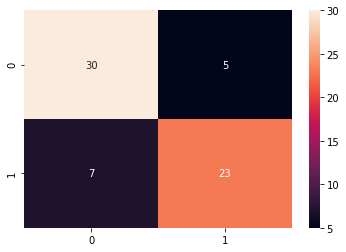

In [25]:
arr2= confusion_matrix(y_test, final_predictions)
sn.heatmap(arr2, annot=True)

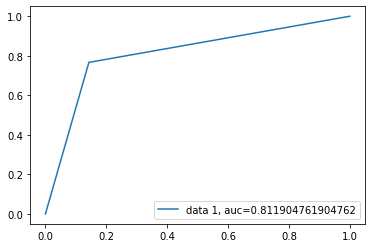

In [27]:
fpr, tpr, _ = metrics.roc_curve(y_test,  final_predictions)
auc = metrics.roc_auc_score(y_test,  final_predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()